# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd
from scipy import linalg

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [2]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [3]:
def svd_validation(A):
    m, n = np.shape(A)
    U, s, Vh = svd(A)
    new_A = np.zeros(np.shape(A))
    for l in np.arange(0,min(m,n)):
        new_A = new_A + s[l] * np.outer(U[:,l:l+1], Vh.T[:,l:l+1]) 
    return np.allclose(new_A,A)

In [4]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)


True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

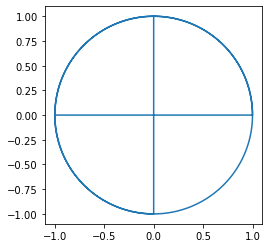

In [7]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [8]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


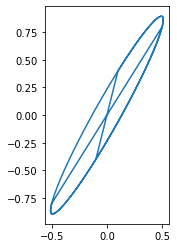

In [9]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [10]:
U, s, V = svd(A)
m, n = np.shape(A)
Σ = linalg.diagsvd(s,m,n)

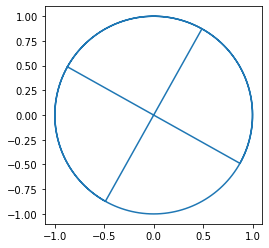

In [11]:
show_circle(U @ circle)

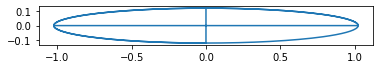

In [12]:
show_circle(Σ @ circle)

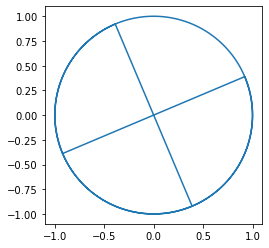

In [13]:
show_circle(V @ circle)

* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?

__Respuesta:__ 
* Lo que resultó de aplicarle el operador $U$ a la circunferencia fue solamente una rotación de la circunferencia.
* Lo que resultó de aplicarle el operador $\Sigma$ a la circunferencia fue un '_achantamiento_'.
* Lo que resultó de aplicarle el operador $V$ a la circunferencia fue nuevamente una rotación, no igual a la ocacionada por $U$, de hecho pareciera que en sentido contrario a esta. 

Además, podemos apreciar que sí influye que $U$ y $V$ sean unitarias, ya que las transformaciones resultantes no modificaron la característica unitaria de la bola, sólo la rotaron, sin embargo la aplicación de $\Sigma$ modificó la medida del eje vertical.

* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

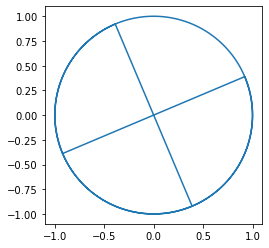

In [14]:
show_circle( V @ circle)

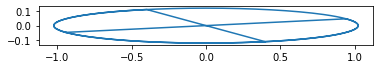

In [15]:
show_circle(Σ @ V @ circle)

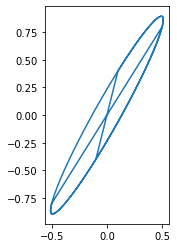

In [16]:
show_circle(U @ Σ @ V @ circle)

__Respuesta:__ Como $A=U\Sigma V$, tenemos que $AC=U\Sigma VC$, entonces aplicar los operadores $U$, $\Sigma$, $V$ a $C$ (en nuestro caso '_circle_') de manera secuencial resultará en la misma transformación obtenida de $AC$. De esta forma, $U$, $\Sigma$, $V$ son una descomposición en rotaciones y achatamiento del operador $A$.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^h,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [17]:
from pathlib import Path
from PIL import Image

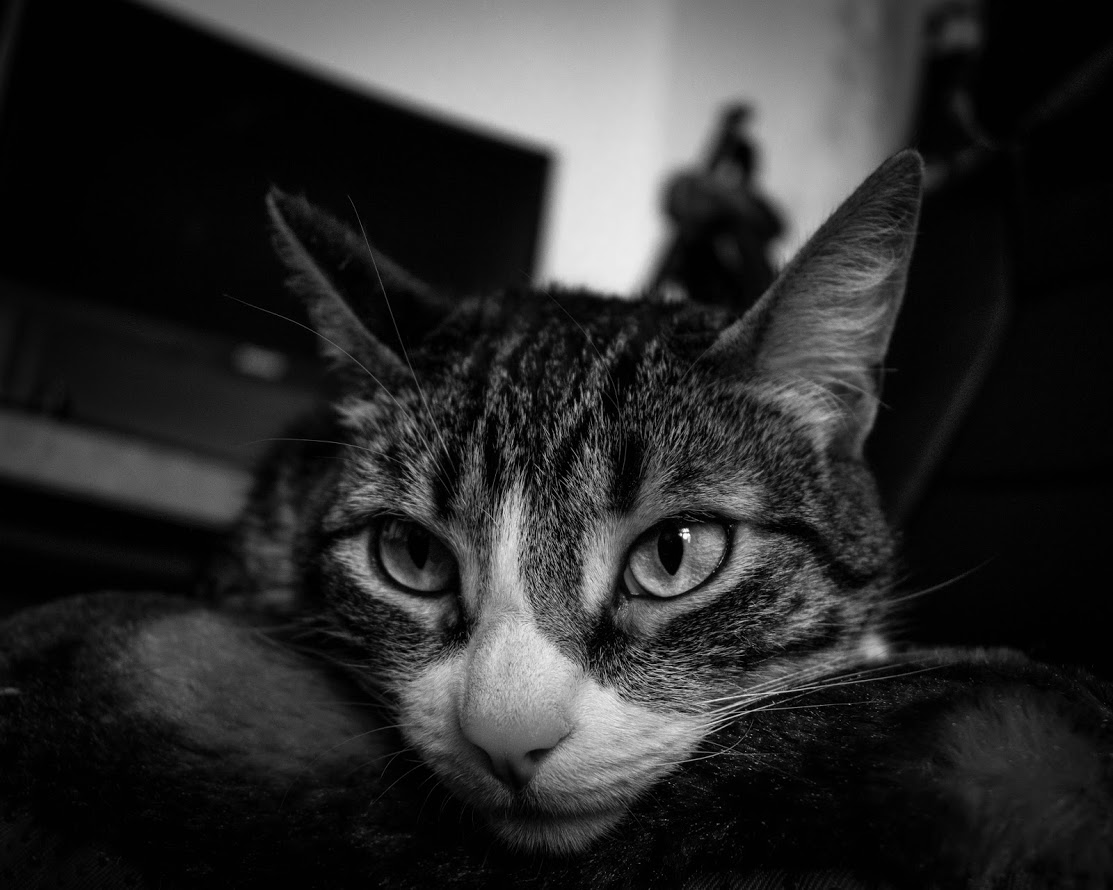

In [18]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve() / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [19]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [20]:
def low_rank_svd_approximation(A, l):
    m, n = np.shape(A)
    U, s, Vh = svd(A)
    A_l = np.zeros(np.shape(A))
    for l in np.arange(0,l):
        A_l = A_l + s[l] * np.outer(U[:,l:l+1], Vh.T[:,l:l+1])
    error = linalg.norm(A - A_l,'fro') 
    normaA=linalg.norm(A ,'fro')
    print(f'El error de aproximación es de {round(error/normaA,4)*100}%')
    return A_l

El error de aproximación es de 22.12%


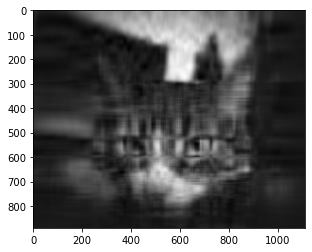

In [21]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

El error de aproximación es de 11.23%


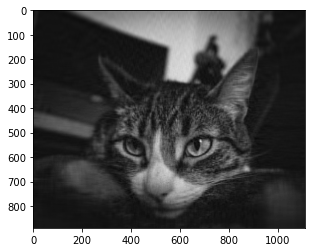

In [22]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [23]:
def low_rank_svd_tol_approximation(A, tol):
    U, s, Vh = svd(A)
    rank = np.linalg.matrix_rank(A)
    for l in np.arange(0,rank):
        factor = linalg.norm(s[l:rank],2)/linalg.norm(s[0:rank],2) 
        if factor <= tol:
            print(f'El rango aproximado de A es l={l+1}')
            break
        l=l+1   
    return low_rank_svd_approximation(A, l+1)

El rango aproximado de A es l=65
El error de aproximación es de 9.86%


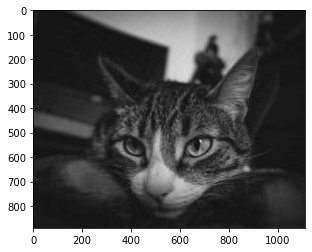

In [24]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El rango aproximado de A es l=458
El error de aproximación es de 0.9900000000000001%


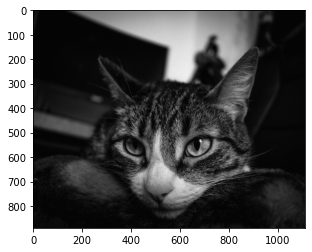

In [25]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

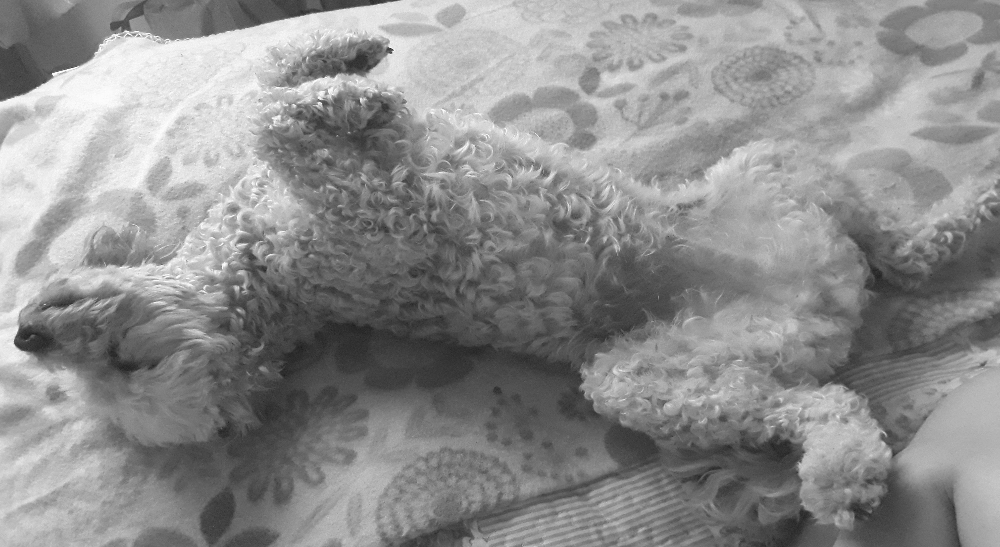

In [26]:
your_img_name = 'canela2.jpg'
your_img = Image.open(Path().resolve() / "images" / your_img_name ).convert('L')
your_img

In [27]:
your_img_np = np.array(your_img)
print(your_img_np.shape)

(547, 1000)


El error de aproximación es de 10.530000000000001%


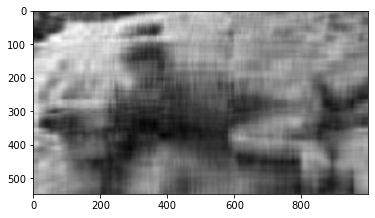

In [28]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

El error de aproximación es de 7.779999999999999%


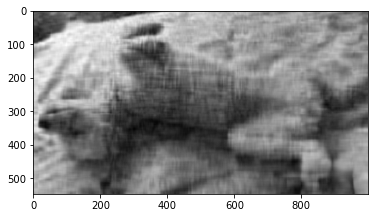

In [29]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

El rango aproximado de A es l=13
El error de aproximación es de 9.5%


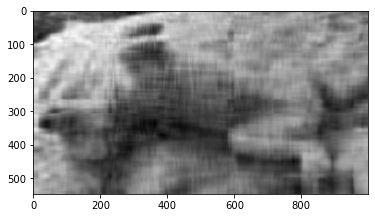

In [30]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

El rango aproximado de A es l=333
El error de aproximación es de 0.9900000000000001%


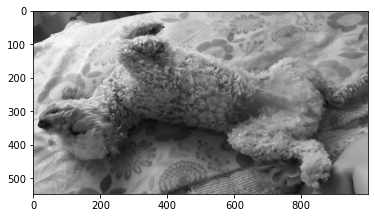

In [31]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ No creo que sea muy útil, pues no es del todo eficiente ya que utilizamos ciclos `for` para su implementación, por lo que se vuelve una manera costosa de comprimir imagenes. De hecho, hice una prueba con una imagen de 3096x4128 y para la toleracia de error $10^{-2}$ y se demoró más de un minuto, razón por la cual dejé una imagen de menor resolucion. Por lo que definitivamente creo que deben existir otras formas más eficientes, las cuales encuentren aproximaciones más rapidamente. Por ejemplo, JPEG basa sus algoritmos en transformadas de Fourier.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [32]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [33]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [34]:
start_date =  pd.to_datetime('2020-10-01', format='%Y-%m-%d')
end_date = pd.to_datetime('2020-10-11', format='%Y-%m-%d')

In [35]:
def calcular_casos_nuevos(col):
    casos_nuevos=[0]
    indices=col.index
    for x in range(1,len(indices)):
        casos_nuevos.append(col[indices[x]]-col[indices[x-1]])
    return casos_nuevos

covid_tasa_promedio_nuevos = (
    covid_comunas.dropna(subset=['codigo_comuna'])
    .fillna(0).drop(columns='tasa')
    .melt(id_vars=['region','codigo_region', 'comuna', 'codigo_comuna', 'poblacion'],var_name = 'fecha', value_name = 'casos_totales')#.sort_values(by=['comuna','fecha'])
    .astype({'fecha':'datetime64'})
    .assign(casos_nuevos = (lambda df: df.groupby("comuna")["casos_totales"].transform(lambda col: calcular_casos_nuevos(col))))
    .loc[lambda df: (df['fecha'] >= start_date) & (df['fecha'] <= end_date)]
    .groupby(['region', 'comuna']).agg(promedio_casos_nuevos = ('casos_nuevos', 'mean'))
    .reset_index()
    .merge(covid_comunas.drop(columns=covid_comunas.columns[5:]).drop(columns=covid_comunas.columns[0:2]).drop(columns=['codigo_comuna']), on=['comuna'])
    .assign(tasa_promedio_casos_nuevos = (lambda df: 100000*df['promedio_casos_nuevos']/df['poblacion']))
    .sort_values(by='tasa_promedio_casos_nuevos', ascending=False)#.reset_index()
)

In [36]:
covid_tasa_promedio_nuevos.head(15)

,region,comuna,promedio_casos_nuevos,poblacion,tasa_promedio_casos_nuevos
163,Magallanes,Timaukel,3.333333,282.0,1182.033097
162,Magallanes,San Gregorio,4.000000,681.0,587.371512
156,Magallanes,Laguna Blanca,1.333333,264.0,505.050505
158,Magallanes,Porvenir,34.333333,7323.0,468.842460
160,Magallanes,Punta Arenas,631.333333,141984.0,444.651040
157,Magallanes,Natales,96.666667,23782.0,406.469879
140,Los Lagos,San Juan de la Costa,20.333333,7639.0,266.177947
139,Los Lagos,Rio Negro,32.333333,14275.0,226.503211
10,Araucanía,Carahue,46.666667,25486.0,183.107065
16,Araucanía,Ercilla,15.333333,8458.0,181.287933


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Que efectivamente son parte de la Región de Magallanes y que si bien su promedio de casos nuevos es pequeño, al ser pueblos con baja población, ese promedio es significativo. También se puede observar que la mayor tasa de una comuna (San Juan de la Costa) que no es de Magallanes es bastante menor, por lo que podemos decir que efectivamente Magallanes es de las regiones más afectadas, en cuanto a contagios, por covid.

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [37]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,794,738,737,832,542,343,706,777,1058,1025
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,972,932,1046,1044,796,714,694,946,1752,906
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1571,1890,2239,3825,1749,1354,1858,1238,1906,2549
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,792,838,1020,939,563,340,237,838,863,781
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1008,1128,1057,1026,473,1503,1050,1125,1351,1245
5,Valparaíso,5,1960170,301.0,249.0,248.0,273.0,223.0,92.0,385.0,...,3257,3185,3309,2640,1410,1798,2740,3285,2612,3852
6,Metropolitana,13,8125072,5383.0,3185.0,2105.0,3861.0,1850.0,1656.0,2694.0,...,12030,13020,12669,13041,5081,6485,11546,12089,13772,13066
7,O’Higgins,6,991063,68.0,NaN,74.0,NaN,74.0,30.0,30.0,...,1537,1595,1435,1315,692,655,1490,1428,1469,1563
8,Maule,7,1131939,397.0,219.0,NaN,341.0,113.0,160.0,NaN,...,1916,2264,2327,1588,640,746,1567,1929,1897,2001
9,Ñuble,16,511551,364.0,NaN,259.0,189.0,65.0,NaN,NaN,...,1150,1032,1054,971,981,536,1144,948,1080,928


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [38]:
covid_pcr_melt = (
    covid_pcr.drop(columns = ['codigo_region', 'poblacion'])
    .melt(id_vars=['region'],var_name = 'fecha', value_name = 'nm_pcr')
    .astype({'fecha':'datetime64'})
    .fillna(0)
)

covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3307,Araucanía,2020-11-01,1878.0
3308,Los Ríos,2020-11-01,836.0
3309,Los Lagos,2020-11-01,5232.0
3310,Aysén,2020-11-01,333.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [39]:
covid_casos_melt = (
    covid_comunas.drop(columns = ['codigo_region', 'comuna', 'codigo_comuna', 'poblacion', 'tasa'])
    .melt(id_vars=['region'],var_name = 'fecha', value_name = 'casos_totales')
    .fillna(0)
    .astype({'fecha':'datetime64'})
    .groupby(['region', 'fecha']).sum()
    .sort_values(by="fecha")
    .reset_index()
)

covid_casos_melt

,region,fecha,casos_totales
0,Antofagasta,2020-03-30,29.0
1,Metropolitana,2020-03-30,1180.0
2,Maule,2020-03-30,48.0
3,Magallanes,2020-03-30,34.0
4,Tarapacá,2020-03-30,5.0
...,...,...,...
1019,Arica y Parinacota,2020-10-30,10088.0
1020,Araucanía,2020-10-30,12540.0
1021,Antofagasta,2020-10-30,22426.0
1022,Valparaíso,2020-10-30,42903.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [40]:
covid_corr_casos_pcr = (pd.merge(covid_pcr_melt, covid_casos_melt, how='outer',  on=['region', 'fecha']))

covid_corr_casos_pcr['nm_pcr'] = covid_corr_casos_pcr['nm_pcr'].fillna(0)
covid_corr_casos_pcr['casos_totales'] = covid_corr_casos_pcr['casos_totales'].fillna(method='ffill')

covid_corr_casos_pcr = covid_corr_casos_pcr.groupby(['region']).apply(lambda df: df["nm_pcr"].corr(df["casos_totales"]))
covid_corr_casos_pcr.sort_values()

region
Metropolitana         0.333325
Valparaíso            0.538736
Antofagasta           0.570008
Atacama               0.593780
Aysén                 0.632499
Biobío                0.652866
O’Higgins             0.657453
Magallanes            0.666356
Maule                 0.675495
Tarapacá              0.693739
Los Ríos              0.715525
Ñuble                 0.724793
Los Lagos             0.749158
Coquimbo              0.752453
Arica y Parinacota    0.791683
Araucanía             0.839836
dtype: float64

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ En todas las regiones la correlación es positiva, por lo que existe evidencia de una proporcionalidad directa entre la cantidad de exámenes PCR realizados y los casos confirmados. Para mí tiene sentido, pues mientras más examenes se realicen más casos se detectan, ya que si, por ejemple, existen miles de contagiados, si solo se realizan cientos de examenes PCR no hay como confimar la totalidad de los casos y por ende no se genera registro de ellos.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [41]:
# FIX ME PLEASE #

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [42]:
# FIX ME PLEASE #

__Respuesta:__